# import libarays

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats 

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder ,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif ,f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler ,LabelEncoder
import xgboost as XGBClassifier
from sklearn.svm import SVC


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


import warnings
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
print('compelet')

compelet


# *Data Exploring*

In [15]:
df = pd.read_csv('fetal_health.csv')
pd.set_option("display.max_columns", None)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [16]:
df.shape

(2126, 22)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [18]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [19]:
df.duplicated().sum()

np.int64(13)

In [20]:
df.drop_duplicates(inplace=True ,keep='first')

***We notice :***
* that there are 22 numerical feature so will not need to encoding
* dosen't exit any null values 
* there are small number of dublicated values 13 row so we can drop them 
* most of column is normal distribution
* there are column that has very low std and this mean that it's values are mostly same for all columns scuch as (light_decelerations ,prolongued_decelerations ,severe_decelerations) column

# *Data Visualization*

In [21]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [22]:
# rename to make easy to understand visualiztion
df['fetal_health'].replace({1:'Normal',2:'suspect' ,3:'pathological'},inplace=True)

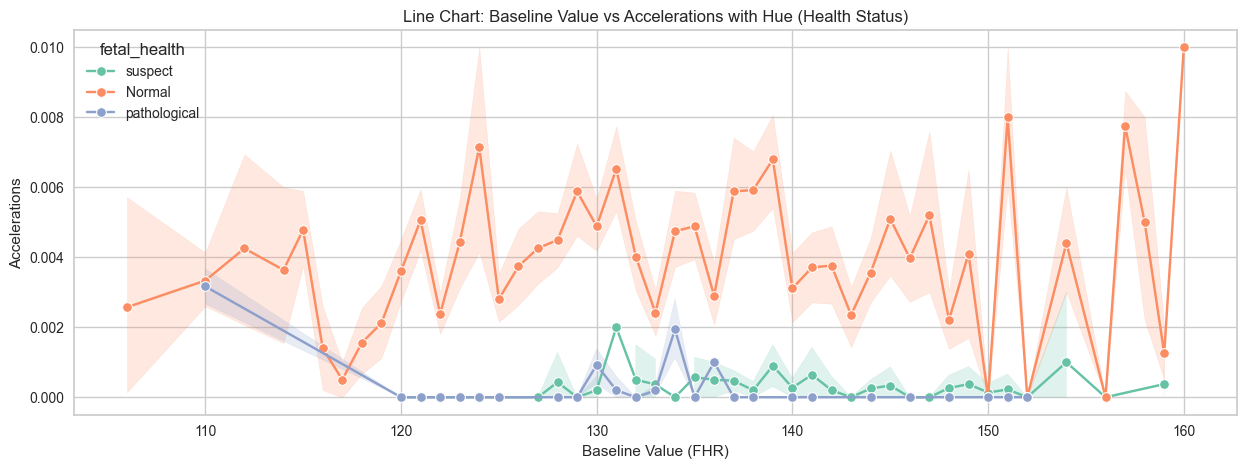

In [23]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='baseline value', y='accelerations', hue='fetal_health', data=df, marker='o', palette='Set2')
plt.title('Line Chart: Baseline Value vs Accelerations with Hue (Health Status)')
plt.xlabel('Baseline Value (FHR)')
plt.ylabel('Accelerations')
plt.grid(True)
plt.show()

***We insight***
* When the values ​​of the accelerations were very small, close to zero, and it started from small values ​​in the baseline value, we could classify it as pathlogical.

* When the acceleration values ​​were small, but the values ​​ranged from 0 to 0.002 and reached large values ​​in the baseline value, we could classify it as suspect. 

* In general, we can say that the values ​​of the accelerations are greater than 0.003, with different baseline values, we can classify them as normal.

* we notice that when the accerlaertion raised the fetal health tends to be more noraml 


In [24]:
fetalMovement_df = df.groupby('fetal_health')['fetal_movement'].count().sort_values(ascending=False).reset_index(name='count')
fetalMovement_df['count'] = fetalMovement_df['count']/len(df)


fig = px.bar(
    fetalMovement_df,
    x='fetal_health',
    y='count',
    color='fetal_health',
    labels={'count': 'Mean'}
)

# Customize the layout
fig.update_layout(
    xaxis_title='Fetal Health',
    yaxis_title='Mean',
    title='Fetal Health Distribution',
    legend_title='Fetal Health',
    bargap=0.4,  
    template='plotly_white'
)

# Show the plot
fig.show()


The less fetal movement, the more it is classified as pathological or suspect

 These CTG take place in the last third of the pregnancy months, so the child will be very fully developed and able to move. When his movement decreases, this is considered an indication that he is pathological or suspect.


In [25]:
# Specify the data and columns
x = 'mean_value_of_short_term_variability'
y = 'fetal_health'

categories = df[y].unique()  # Get unique categories in the 'fetal_health' column
hist_data = [df[df[y] == category][x] for category in categories]  # Data for each category
palette = ['#636EFA', '#EF553B', '#00CC96']  # Define a color palette

# Create the KDE plot using plotly
fig = ff.create_distplot(hist_data, group_labels=categories, show_hist=False, show_rug=False, colors=palette)

# Fill the area under the curves
for trace in fig.data:
    trace.update(fill='tozeroy')

# Update layout with titles and axis labels
fig.update_layout(
    title=f'Distribution of {x} Across Different {y} Categories',
    xaxis_title=x,
    yaxis_title='Density'
)

# Display the plot
fig.show()


The short-term variability (STV) is the difference between one beat and the next.

so When the difference between them extremely increases, this indicates that the heart rate is accelerating and suddenly falling, and therefore the fetus's condition is classified as worrying (Pathological Class).

 On the other hand, when the difference between the beats is almost constant, this indicates that the heart rate is kind of constant, and this raises suspicion(Suspect Class). 

However, when the rate of change is stable(have normal variability), this indicates the presence of a natural change in the fetal heart rate(Normal Class)


In [26]:
fig = px.scatter(df, 
                 x='histogram_mode', 
                 y='histogram_mean',
                 color='fetal_health',
                 size='histogram_mean')


fig.update_traces(marker=dict(
    line=dict(
        width=0.8,  
        color='black' 
    )
))
fig.show()

We have many features that express the histogram, such as mean, media, and mode, and we notice that between these features there is a strong relationship
 
These three measures can help doctors understand the overall trends or general pattern of the fetal heart rate. If there are significant changes in the mean, median, or mode, it could be an indication of issues with blood or oxygen flow to the fetus, which may require medical intervention.

In [27]:
severe_decelerations_count =df.groupby('severe_decelerations')['fetal_health'].count().reset_index(name='count')
light_decelerations_count =df.groupby('light_decelerations')['fetal_health'].count().reset_index(name='count')
prolonged_decelerations_count =df.groupby('prolongued_decelerations')['fetal_health'].count().reset_index(name='count')

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('Severe Decelerations','Prolonged Decelerations','Light Decelerations'),
                    specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]])

fig.add_trace(go.Pie(labels=severe_decelerations_count['severe_decelerations'],
                     values=severe_decelerations_count['count'],
                     hole=0.5),
              row=1, col=1)

fig.add_trace(go.Pie(labels=prolonged_decelerations_count['prolongued_decelerations'],
                     values=prolonged_decelerations_count['count'],
                     hole=0.5),
              row=1, col=2)

fig.add_trace(go.Pie(labels=light_decelerations_count['light_decelerations'],
                     values=light_decelerations_count['count'],
                     hole=0.5),
              row=1, col=3)



fig.update_layout(title_text='Distribution of Different Types of Decelerations',
                  showlegend=True)

Severe Decelerations :  In our data, this doesn't hold much value because 99% of the rows have a value of 0, so we won't focus on it.

Light Decelerations : These are minor drops in the fetal heart rate. If they occur occasionally, they are generally not a problem. However, if they happen frequently, they could indicate a potential issue. This is something that becomes more critical when we talk about prolonged decelerations.

Prolonged decelerations :  refer to a continuous drop in the fetal heart rate that lasts longer than usual. Unlike the quick drops in severe decelerations (SDs), this type of deceleration persists for over 2 to 3 minutes. While the drop might not be as sharp as SDs, its extended duration could be a sign of ongoing issues like oxygen flow problems to the fetus, issues with the placenta, or complications during labor.
ubheading

In [28]:
x = df.fetal_health.value_counts().sort_values(ascending=False)
histogram = px.histogram(x,x.index,x.values)
pie_chart = px.pie(df, names='fetal_health')

plots = make_subplots(rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]]) 

plots.add_trace(histogram['data'][0], row=1, col=1)
plots.add_trace(pie_chart['data'][0], row=1, col=2)

plots.update_layout( title_text="Fetal Health Analysis")

In [29]:
# Define the variables for plotting
x = 'uterine_contractions'
y = 'fetal_health'

# Get unique categories in the 'fetal_health' column
categories = df[y].unique()

# Extract data for each category
hist_data = [df[df[y] == category][x] for category in categories]

# Define a color palette (customize as needed)
palette = ['#636EFA', '#EF553B', '#00CC96']

# Create the KDE plot using plotly
fig = ff.create_distplot(hist_data, group_labels=categories, show_hist=False, show_rug=False, colors=palette)

# Fill the area under the curves
for trace in fig.data:
    trace.update(fill='tozeroy')

# Update layout with titles and axis labels
fig.update_layout(
    title=f'Distribution of {x} Across Different {y} Categories',
    xaxis_title=x,
    yaxis_title='Density'
)

# Display the plot
fig.show()


* when having low uterine contractions fetal health tends to be kind of abnormal 
* Suspect,Pathological fetal are right skewed which means that the lower uterine_contractions gets the more fetal health problems occur

In [30]:
# Define the variables for plotting
x = 'light_decelerations'
y = 'fetal_health'

# Get unique categories in the 'fetal_health' column
categories = df[y].unique()

# Extract data for each category
hist_data = [df[df[y] == category][x] for category in categories]

# Define a color palette (customize as needed)
palette = ['#636EFA', '#EF553B', '#00CC96']

# Create the KDE plot using plotly
fig = ff.create_distplot(hist_data, group_labels=categories, show_hist=False, show_rug=False, colors=palette)

# Fill the area under the curves
for trace in fig.data:
    trace.update(fill='tozeroy')

# Update layout with titles and axis labels
fig.update_layout(
    title=f'Distribution of {x} Across Different {y} Categories',
    xaxis_title=x,
    yaxis_title='Density'
)

# Display the plot
fig.show()


# *Data preproccesing*

In [31]:
df['fetal_health'].replace({'Normal':1,'suspect':2 ,'pathological':3},inplace=True)

* ***show what is the best scaling to apply on data***

In [32]:
data = df.drop(columns=['fetal_health'])

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaled_data = {}

for scaler_name, scaler in scalers.items():
    scaled_data[scaler_name] = scaler.fit_transform(data)


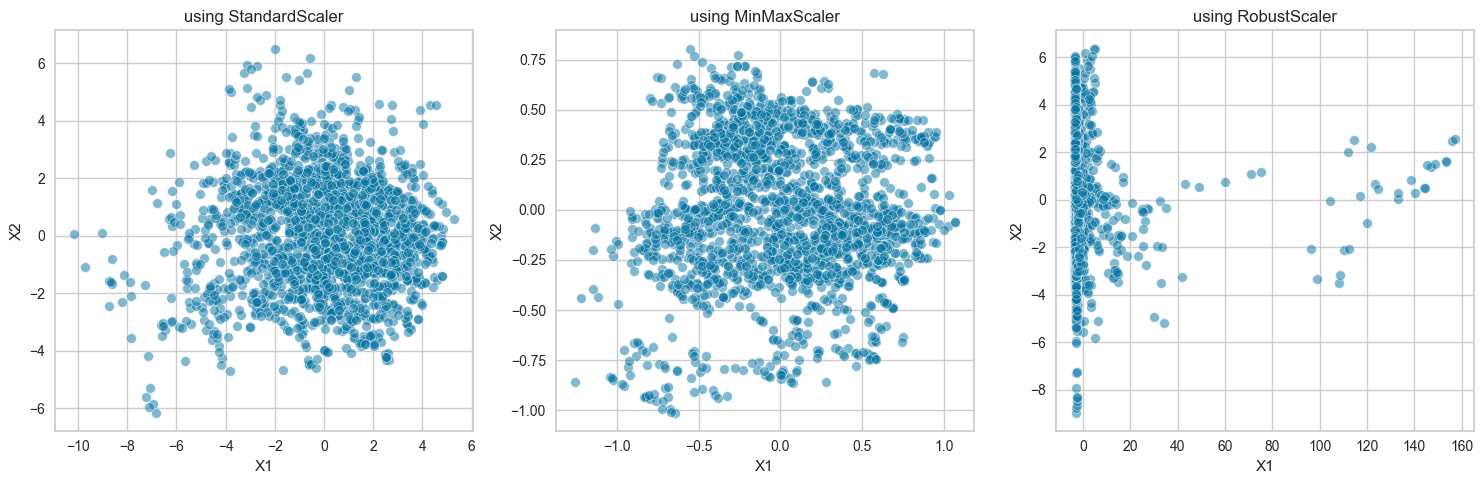

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes.flatten()
for i ,scaler in enumerate(scaled_data):
    # Apply pca algrithm
    pca = PCA(n_components=2)
    data = pca.fit_transform(scaled_data[scaler])
    data = pd.DataFrame(data, columns=['X1', 'X2'])

    # PLot the distribution of data
    sns.scatterplot(x=data['X1'] ,y=data['X2'],alpha=0.5,ax=axes[i])
    axes[i].set_title(f'using {scaler}')
    
    
plt.tight_layout()
plt.show()

*becouse we will try some algrithms depend on distance such as SMOTE , K-mean in clustering* 
*so we will choose the Min-Max scaling as it the best scaling in represent feature*

* ***solve imbalance problem using smote***

In [34]:
X = df.drop('fetal_health', axis=1) 
y = df['fetal_health']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# apply min max scaler before smote as it senstive to distance
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
# Print class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Define the desired number of samples for each class
over_sampling = {1: 1600, 2: 1600, 3: 1600}  
# Apply SMOTE to oversample the training data
smote = SMOTE(sampling_strategy=over_sampling, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({1: 1152, 2: 204, 3: 123})
After SMOTE: Counter({1: 1600, 3: 1600, 2: 1600})


In [36]:
resampled_df = pd.DataFrame(X_train, columns=X.columns)
resampled_df['fetal_health'] = y_train

In [37]:
fig= px.pie(resampled_df, names='fetal_health')
plots.update_layout( title_text="Fetal Health Analysis")

fig.show()

* ***handel outliers***

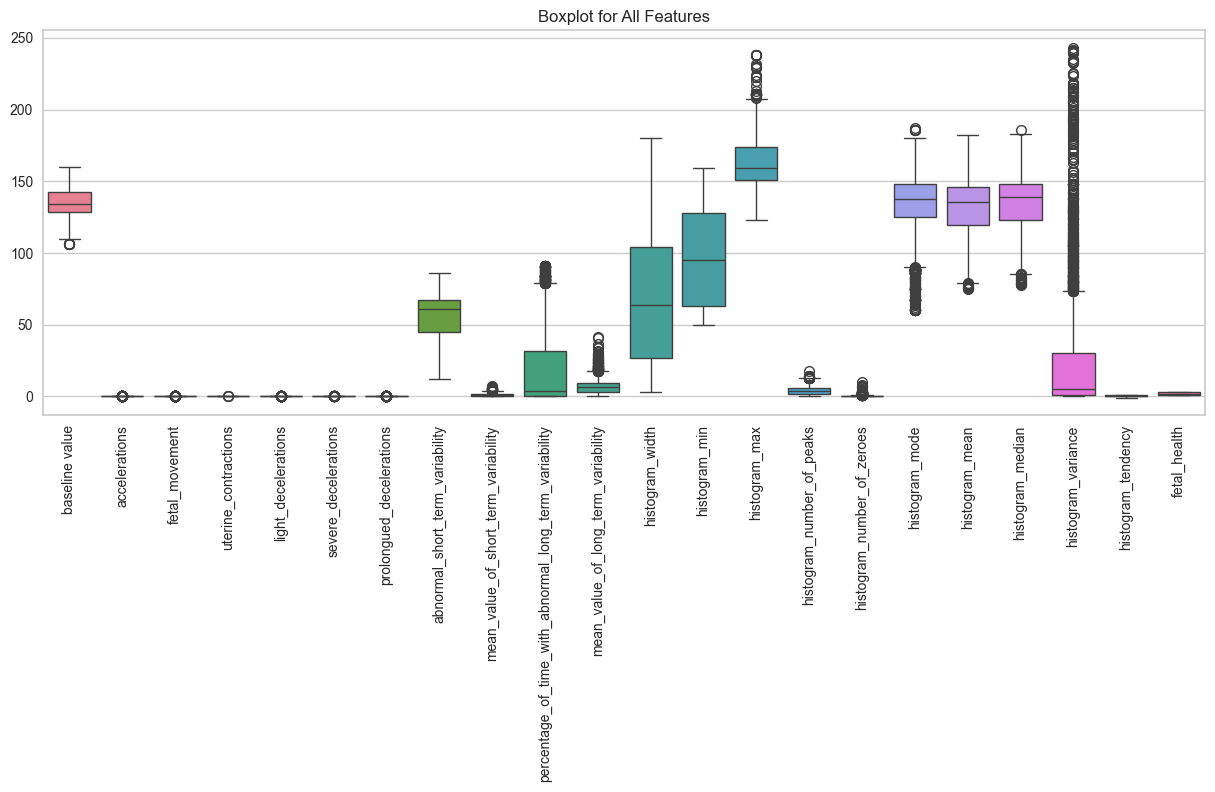

In [38]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=resampled_df)
plt.title('Boxplot for All Features')
plt.xticks(rotation=90)  

plt.show()


There are many outliers. It is not new to get rid of them completely because they are likely to represent rare cases, but we will reduce the percentage of outliers so that we get better results in the modeling stage.

In [39]:
df2 = resampled_df.copy()
df2 = df2.apply(zscore)

thresholds = np.arange(1, 3.5, 0.2)

best_threshold = None
best_score = float('inf')

for threshold in thresholds:
    outliers = df2[(df2.abs() > threshold).any(axis=1)]  
    non_outliers = df2[(df2.abs() <= threshold).all(axis=1)] 

    outliers_ratio = len(outliers) / len(df2)
    
    # check if outlier ratio is within acceptable range (5% to 30%)
    if 0.05 <= outliers_ratio <= 0.3:
        score = abs(outliers_ratio - 0.2)
        if score < best_score: # update best score and threshold if this is closer to 20%
            best_score = score
            best_threshold = threshold

print(f"The best threshold is {best_threshold} and the outlier is {outliers_ratio}")


The best threshold is 2.5999999999999996 and the outlier is 0.10895833333333334


In [40]:
df2 = resampled_df.copy()
df2 = df2.apply(zscore)

resampled_df = resampled_df[(df2.abs() < best_threshold).all(axis=1)]


* ***Check skewness***

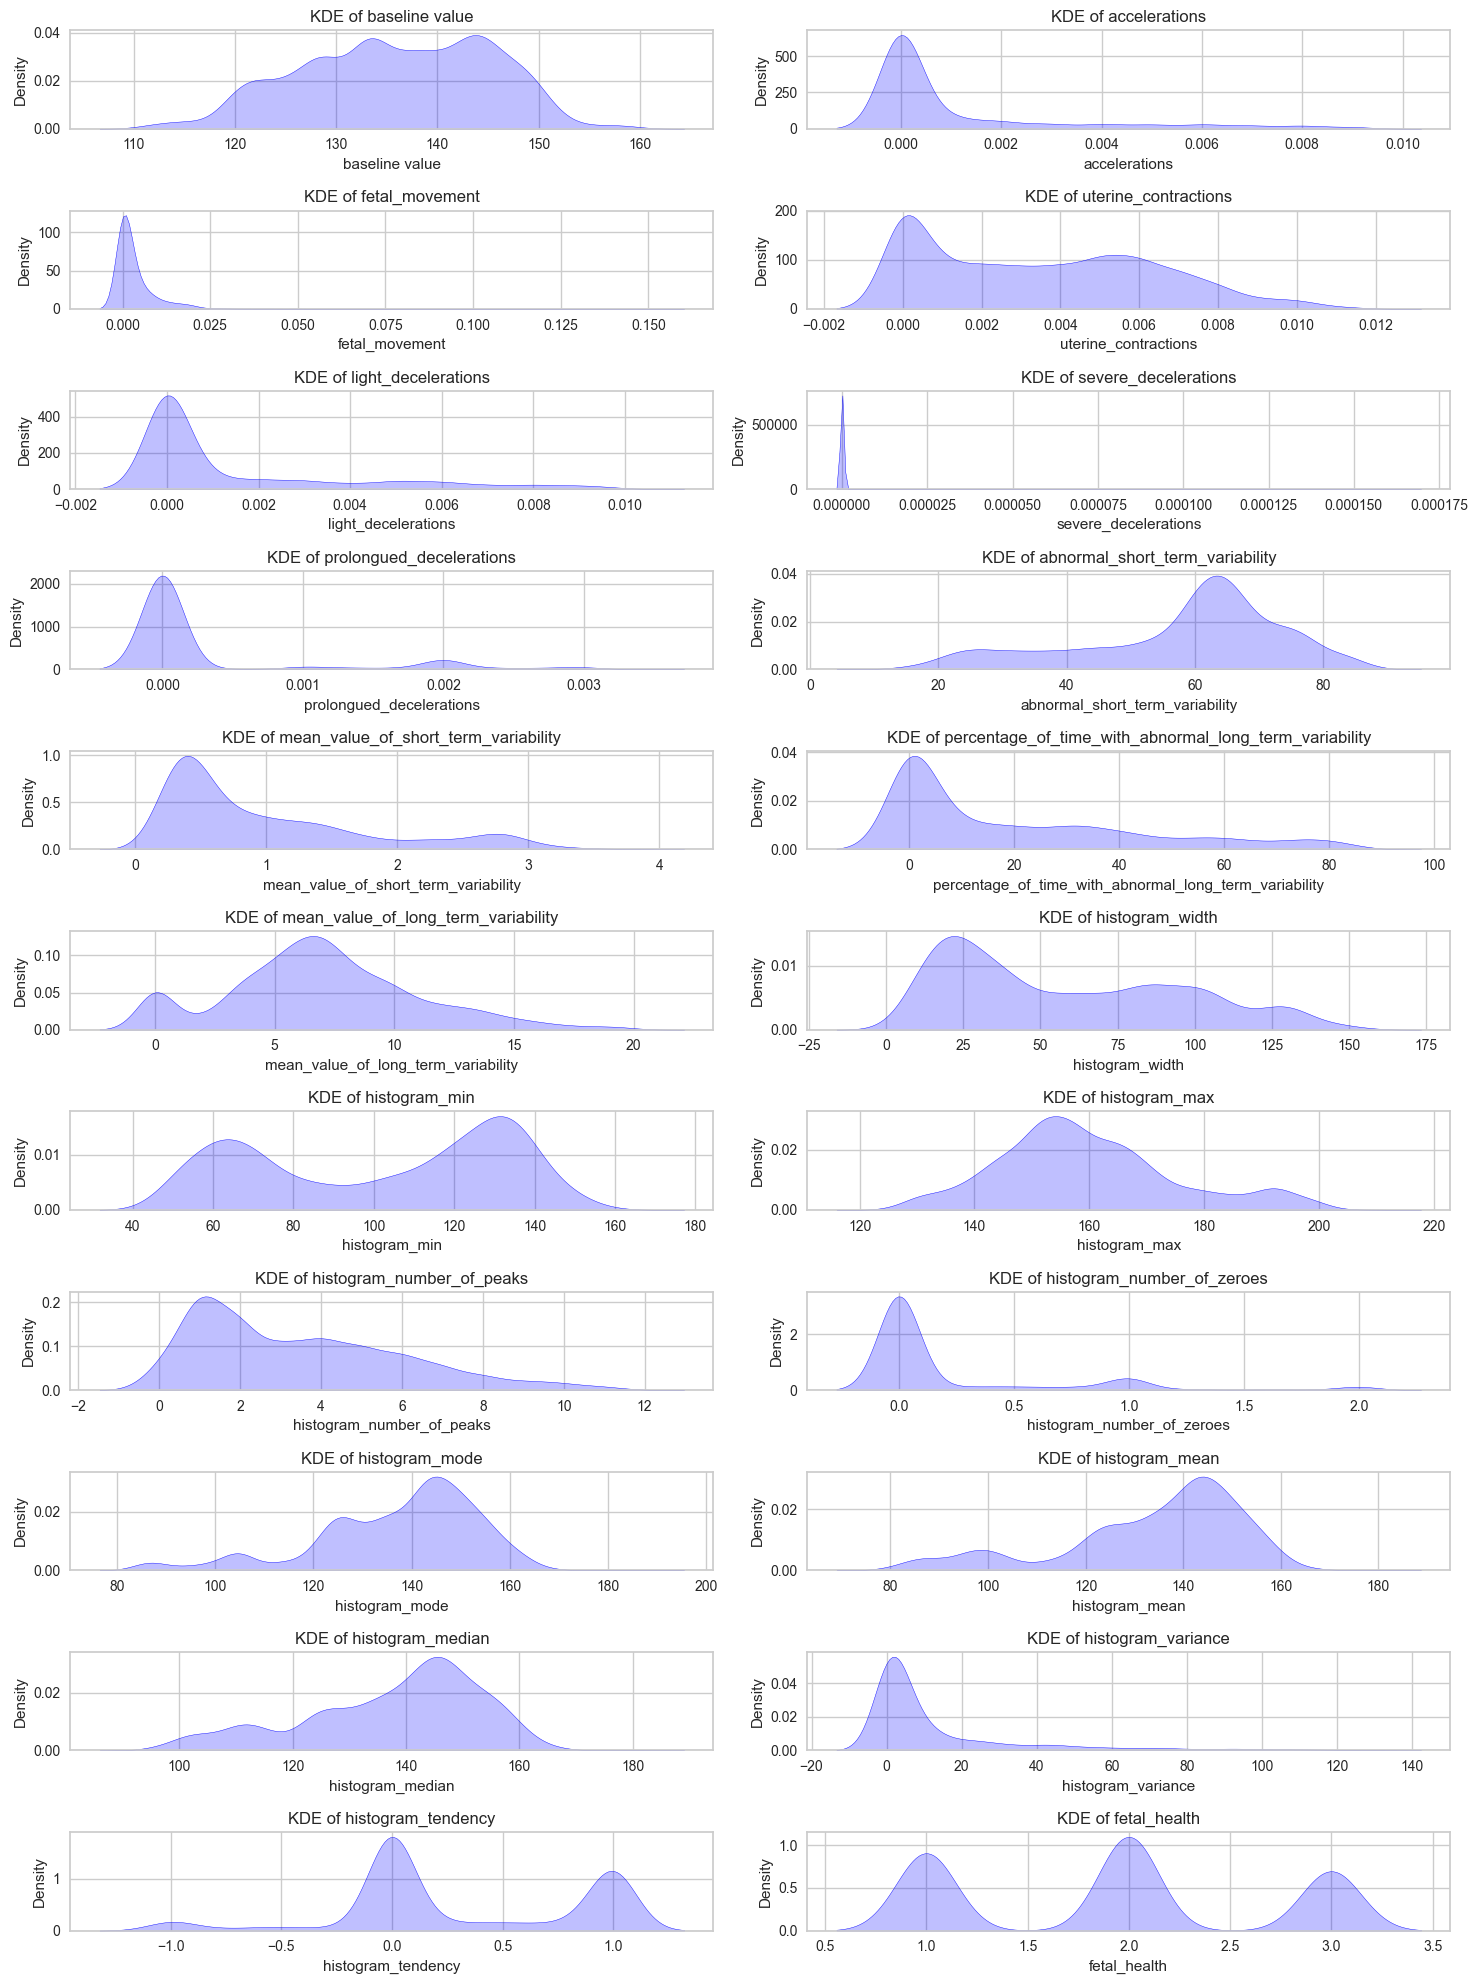

In [41]:
num_features = len(df.columns)
num_rows = (num_features + 1) // 2 
plt.figure(figsize=(15, 20))

for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 2, i) 
    sns.kdeplot(resampled_df[column], fill=True,color='blue')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout() 
plt.show()

* ***Select K-best feature using PCA***

In [42]:

X = resampled_df.drop('fetal_health', axis=1)
y = resampled_df['fetal_health']

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)


In [43]:
for i, ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"Component {i+1}: {ratio:.4f}")


Component 1: 0.6393
Component 2: 0.1435
Component 3: 0.0899
Component 4: 0.0586
Component 5: 0.0338
Component 6: 0.0244
Component 7: 0.0047
Component 8: 0.0032
Component 9: 0.0015
Component 10: 0.0008
Component 11: 0.0005
Component 12: 0.0000
Component 13: 0.0000
Component 14: 0.0000
Component 15: 0.0000
Component 16: 0.0000
Component 17: 0.0000
Component 18: 0.0000
Component 19: 0.0000
Component 20: 0.0000
Component 21: 0.0000


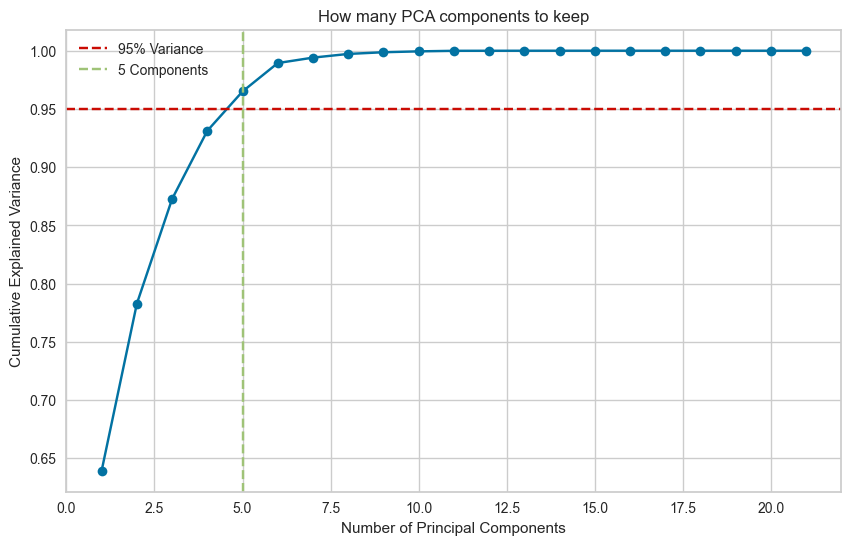

In [44]:

cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('How many PCA components to keep')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axvline(x=5, color='g', linestyle='--', label='5 Components')
plt.legend()
plt.show()


*We will take only 5 feature that represent more than 95% of data*

In [45]:
# select only the 5 features
X_pca_5 = X_pca_full[:, :5]
X_train, X_test, y_train, y_test = train_test_split(X_pca_5, y, test_size=0.2, random_state=42)

y_train = y_train.replace({1: 0, 2: 1, 3: 2})
y_test = y_test.replace({1: 0, 2: 1, 3: 2})

# *modeling*

In [ ]:

# Updated grid function with error handling
def grid(model, params, X_train, y_train, model_name):
    """
    Performs grid search cross-validation for hyperparameter tuning with error handling.
    """
    try:
        grid = GridSearchCV(model, params, cv=5, scoring='f1_weighted', n_jobs=-1)
        grid.fit(X_train, y_train)
        if hasattr(grid, 'best_params_'):
            print(f'{model_name} ==> {grid.best_params_}')
        else:
            print(f'{model_name} ==> No best_params_ found. Grid search may have failed.')
        return grid
    except Exception as e:
        print(f'Error in GridSearchCV for {model_name}: {str(e)}')
        return None

# Updated display_grid function with simplified parameters
def display_grid(X_train, y_train):
    """
    Runs grid search cross-validation for several models and their respective hyperparameters.
    """
    # Simplified parameter grids to reduce computation time
    svc_params = {
    'C': [10, 100,150,200],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
    }
    randomforest_params = {
        'n_estimators': [10,15,20,30,50],
        'max_depth': [3, 5, 10, 15, 20]
    }
    adaboost_params = {
        'n_estimators': [100,200,250,300],
        'learning_rate': [0.01,0.1,0.5,1]
    }
    gradientboost_params = {
        'n_estimators': [200,250,300],
        'learning_rate': [0.01,0.1],
        'max_depth': [5,7]
    }
    xgboost_params = {
        'n_estimators': [30,50,100,200],
        'learning_rate': [0.01,0.1,0.5,1],
        'max_depth': [3,5,6,8],
        'gamma': [0,0.5,1]  
    }

    models = [
        (SVC(random_state=0), svc_params, 'SVC'),
        (RandomForestClassifier(random_state=0), randomforest_params, 'RandomForestClassifier'),
        (AdaBoostClassifier(random_state=0), adaboost_params, 'AdaBoostClassifier'),
        (GradientBoostingClassifier(random_state=0), gradientboost_params, 'GradientBoostingClassifier'),
        (XGBClassifier(random_state=0), xgboost_params, 'XGBClassifier')

    ]

    for model, param, model_name in models:
        grid(model, param, X_train, y_train, model_name)

 
def display_model(models, X_train, X_test, y_train, y_test):
    results = {
        'Model': [],
        'Train F1': [],
        'Test F1': []
    }
    
    for model in models:
        model_name = type(model).__name__
        print(model_name)
        
        # Train F1
        train_score = cross_val_score(model, X_train, y_train, cv=5, scoring="f1_weighted").mean()
        print(f'Average F1_weighted on training: {train_score:.4f}')
        
        # Fit and predict
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        # Test F1
        test_score = f1_score(y_test, pred, average='weighted')
        print(classification_report(y_test, pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, pred)
        dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Suspect', 'Pathological'])
        dis.plot(cmap='Blues')
        plt.show()

        # Store results
        results['Model'].append(model_name)
        results['Train F1'].append(train_score)
        results['Test F1'].append(test_score)

    return results

In [ ]:
display_grid(X_train,y_train)

SVC ==> {'C': 200, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
RandomForestClassifier ==> {'max_depth': 20, 'n_estimators': 50}
AdaBoostClassifier ==> {'learning_rate': 0.5, 'n_estimators': 200}
GradientBoostingClassifier ==> {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBClassifier ==> {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 100}


SVC
Average F1_weighted on training 0.9808273894297098
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       494
           1       0.73      0.74      0.73        88
           2       0.89      0.75      0.81        52

    accuracy                           0.91       634
   macro avg       0.85      0.81      0.83       634
weighted avg       0.91      0.91      0.91       634



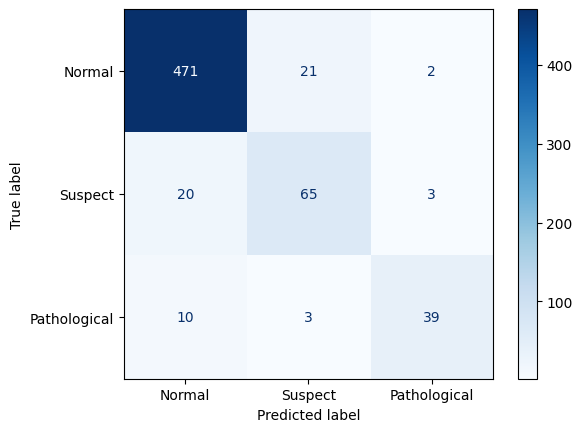

RandomForestClassifier
Average F1_weighted on training 0.9740796325325739
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       494
           1       0.77      0.78      0.78        88
           2       0.89      0.94      0.92        52

    accuracy                           0.93       634
   macro avg       0.87      0.89      0.88       634
weighted avg       0.93      0.93      0.93       634



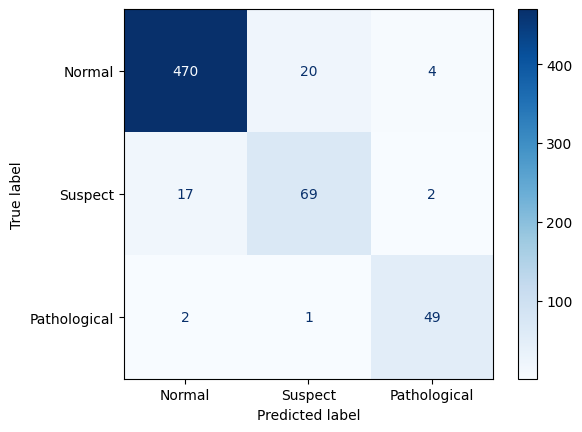

AdaBoostClassifier
Average F1_weighted on training 0.8677302295382274
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       494
           1       0.52      0.84      0.65        88
           2       0.91      0.75      0.82        52

    accuracy                           0.85       634
   macro avg       0.79      0.82      0.79       634
weighted avg       0.88      0.85      0.86       634



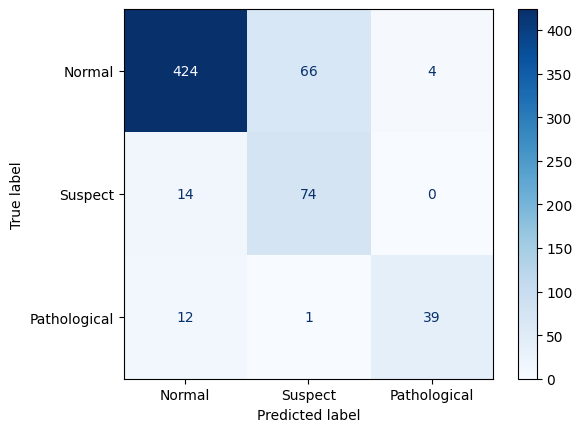

GradientBoostingClassifier
Average F1_weighted on training 0.9806199292594607
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       494
           1       0.84      0.80      0.82        88
           2       0.91      0.96      0.93        52

    accuracy                           0.94       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.94      0.94      0.94       634



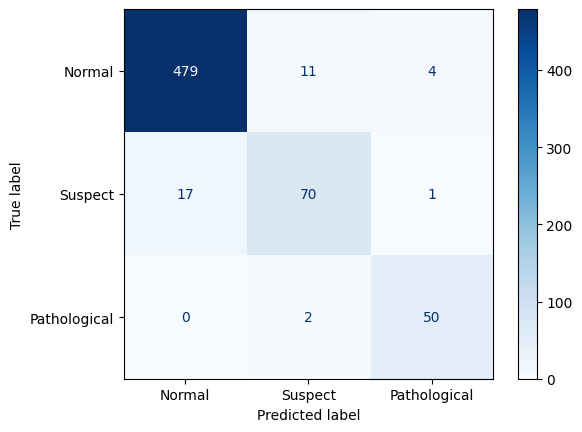

XGBClassifier
Average F1_weighted on training 0.9838881065742088
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       494
           1       0.81      0.80      0.80        88
           2       0.90      0.88      0.89        52

    accuracy                           0.93       634
   macro avg       0.89      0.88      0.89       634
weighted avg       0.93      0.93      0.93       634



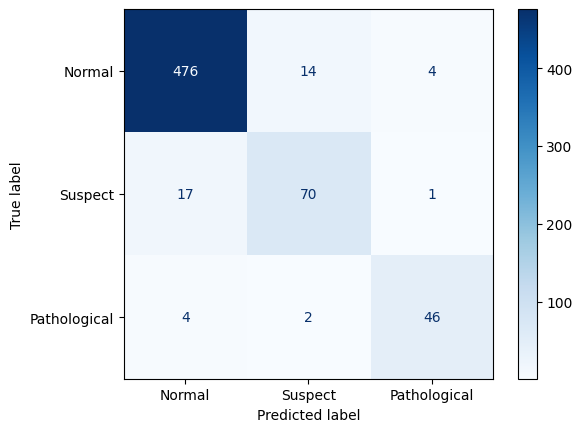

In [ ]:

svc = SVC(C=200, degree=2, gamma='auto', kernel='rbf',random_state=0)
rf = RandomForestClassifier(max_depth=20, n_estimators=50,random_state=0)
ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=200,random_state=0)
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200,random_state=0)
xgb = XGBClassifier(gamma= 0,learning_rate=0.5, max_depth=8, n_estimators=100,random_state=0)

models = [svc, rf, ada, gb, xgb]
results = display_model(models,X_train,X_test,y_train,y_test)

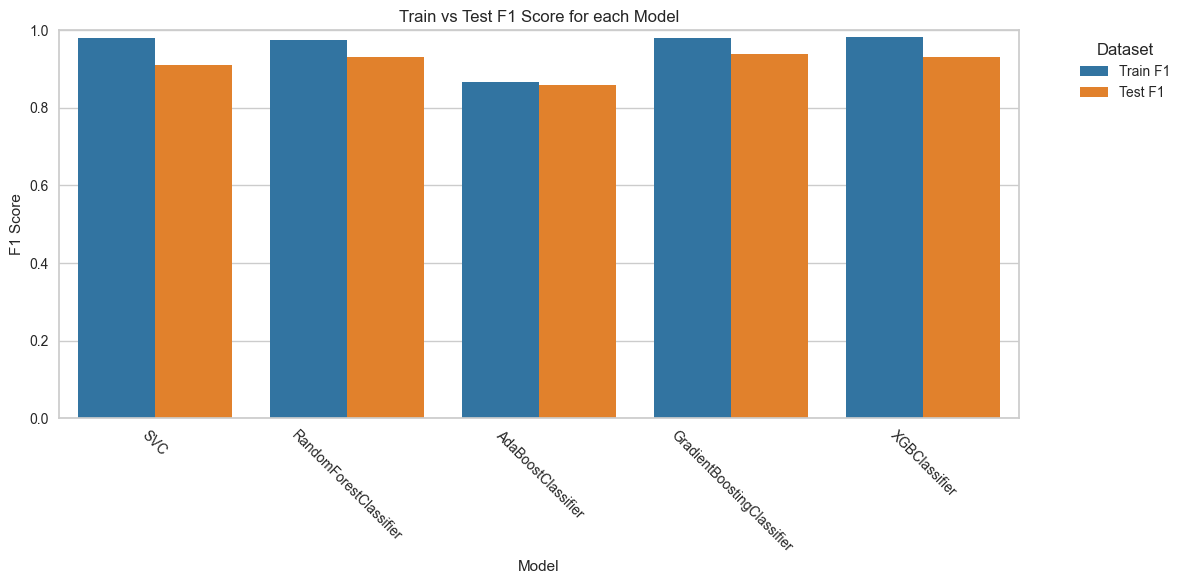

In [ ]:
df_results = pd.DataFrame(results)

df_plot = df_results.melt(id_vars='Model', var_name='Dataset', value_name='F1 Score')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Model', y='F1 Score', hue='Dataset')
plt.title('Train vs Test F1 Score for each Model')
plt.ylim(0, 1)
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout() 
plt.xticks(rotation=-45)
plt.show()

# Cluster 

In [46]:
df_kmean =resampled_df.drop(columns=['fetal_health']).copy()

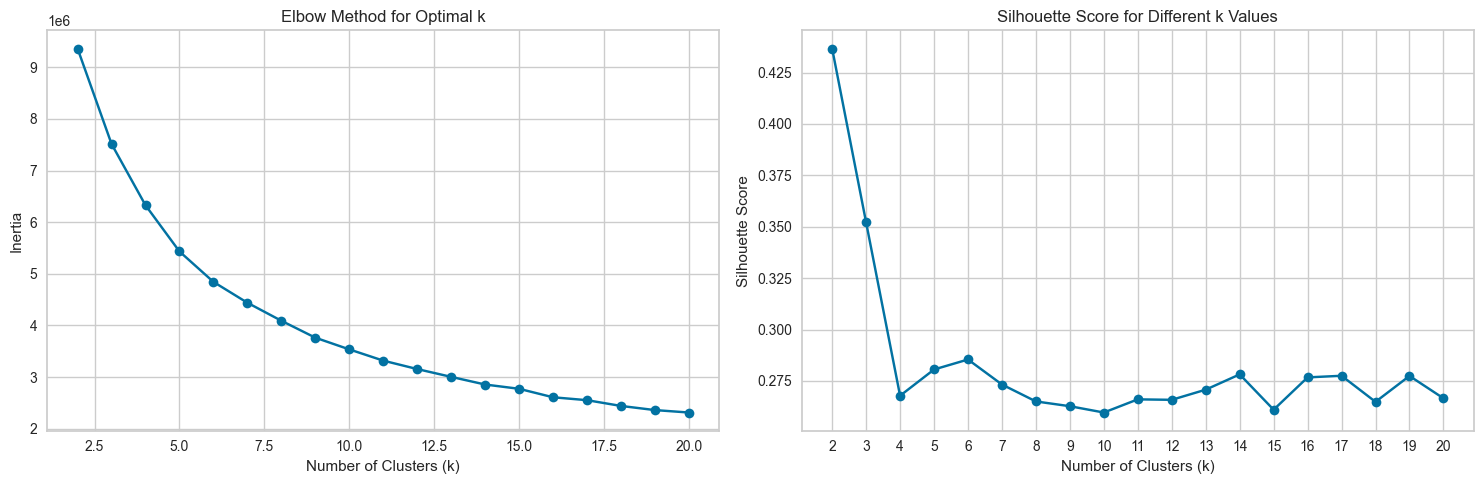

In [47]:
kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

inertias = []
silhouette_scores = []

k_values = range(2, 21)
for k in k_values:

    kmeans = KMeans(n_clusters=k, **kmeans_set)
    cluster_labels = kmeans.fit_predict(df_kmean) 
    
    inertia = kmeans.inertia_
    inertias.append(inertia)
    
    score = silhouette_score(df_kmean, cluster_labels)
    silhouette_scores.append(score)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(k_values, inertias, marker='o')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].grid(True)

axes[1].plot(k_values, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Different k Values')
axes[1].set_xticks(k_values)
axes[1].grid(True)

plt.tight_layout()
plt.show()


*We notice that the K=6 achive good inertia and silhoutee so we will use K=6*

*see the cluster of data using pca*

In [48]:
# convert all feature to only tow feature to vaisualtion
pca = PCA(n_components=2)
df_kmean = pca.fit_transform(df_kmean)
df_kmean= pd.DataFrame(df_kmean, columns=['X1', 'X2'])
df_kmean.head()

,X1,X2
0,-70.165770,17.467753
1,-44.994386,-45.456482
2,-42.564416,5.887659
3,45.178004,-9.828545
4,92.389002,45.126487


In [49]:
kmeans = KMeans(n_clusters=6,**kmeans_set) 
kmeans.fit(df_kmean)
cluster_labels = kmeans.fit_predict(df_kmean) 
df_kmean['Cluster'] =cluster_labels
df_kmean.head()

,X1,X2,Cluster
0,-70.165770,17.467753,2
1,-44.994386,-45.456482,1
2,-42.564416,5.887659,2
3,45.178004,-9.828545,3
4,92.389002,45.126487,5


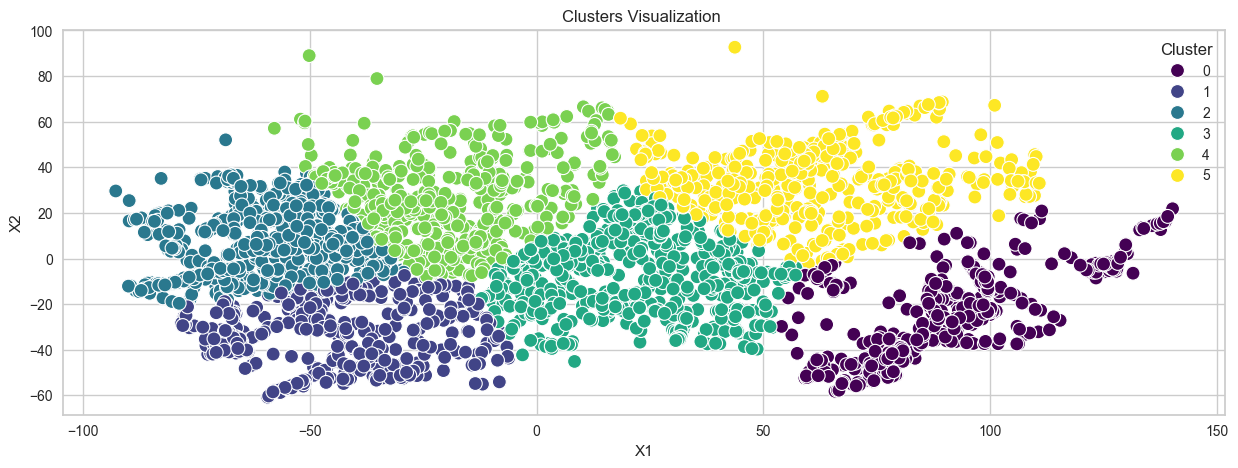

In [50]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='X1', y='X2', hue='Cluster', data=df_kmean, palette='viridis',s=100)
plt.title('Clusters Visualization ')
plt.show()

In [ ]:
.

# Deployment

In [155]:
import pickle

model = gb
model.fit(X_train, y_train)

# Save the model
with open('GBC_Semi_final_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
with open('GBC_Semi_final_model_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
# file .py

import streamlit as st
import pickle
import numpy as np

# Load your model and scaler
model = pickle.load(open(r'GBC_Semi_final_model.pkl', 'rb'))
scaler = pickle.load(open(r'GBC_Semi_final_model_scaler.pkl', 'rb'))

def predict(features):
    # Preprocess features
    scaled_features = scaler.transform([features])
    prediction = model.predict(scaled_features)
    return prediction

def main():
    st.title('Machine Learning Model Fetal Health Deployment team 2 Samsung Innovation Campus SIC')

    # Add input fields for all 19 features
    feature1 = st.number_input('Feature 1', min_value=0.0, max_value=100.0, value=0.0)
    feature2 = st.number_input('Feature 2', min_value=0.0, max_value=100.0, value=0.0)
    feature3 = st.number_input('Feature 3', min_value=0.0, max_value=100.0, value=0.0)
    feature4 = st.number_input('Feature 4', min_value=0.0, max_value=100.0, value=0.0)
    feature5 = st.number_input('Feature 5', min_value=0.0, max_value=100.0, value=0.0)


    if st.button('Predict'):
        features = [feature1, feature2, feature3, feature4, feature5]
        prediction = predict(features)
        st.write(f'Prediction: {prediction[0]}')

if __name__ == '__main__':
    main()

# Thank You